<a href="https://colab.research.google.com/github/munnurumahesh03-coder/Customer-Churn-Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automated Data Quality Reporting**

---



In [55]:
# Install the ydata-profiling library quietly
!pip install ydata-profiling -q

In [56]:
import pandas as pd
from ydata_profiling import ProfileReport

# The file is in our current directory, so we can just use its name
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Load the data
df = pd.read_csv(file_path)

# Generate and display the report
profile = ProfileReport(df, title="Telco Customer Churn - Data Quality Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:04<00:00,  4.68it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Initial Data Assessment (Manual)**

---



In [58]:
# Display a concise summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
# Generate descriptive statistics for numerical columns.
print("\n--- Descriptive Statistics (Numerical Columns) ---")
df.describe()


--- Descriptive Statistics (Numerical Columns) ---


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [60]:
# Check the distribution of the 'Churn' column.
print("\n--- Target Variable Distribution (Churn) ---")
df['Churn'].value_counts(normalize=True) * 100


--- Target Variable Distribution (Churn) ---


,proportion
Churn,
No,73.463013
Yes,26.536987


# **Exploratory Data Analysis (EDA) & Outlier Strategy**

---



In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set a professional and aesthetically pleasing style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Set default figure size

print("✅ Libraries imported and plot style set.")

✅ Libraries imported and plot style set.


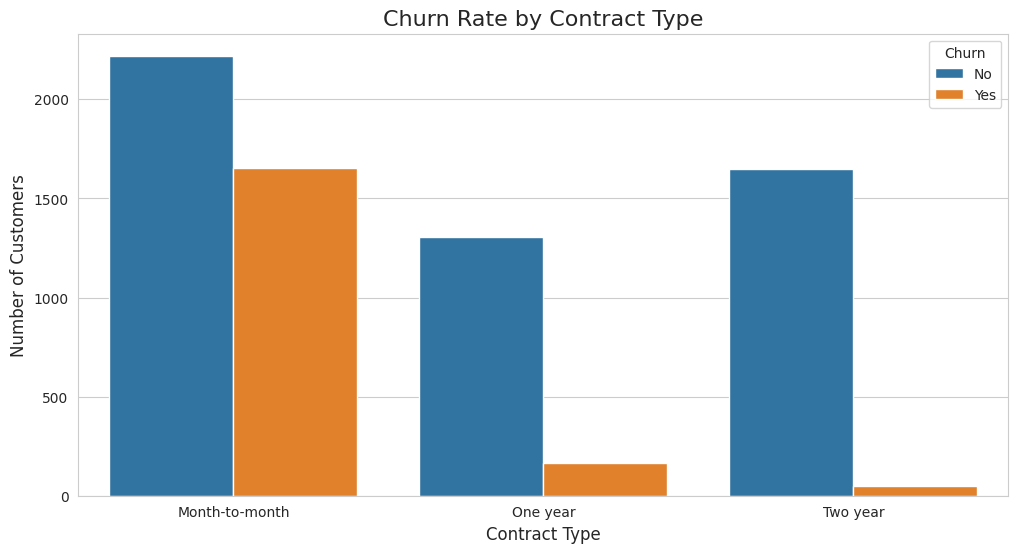

In [62]:
# Create a count plot to show churn distribution across different contract types
sns.countplot(data=df, x='Contract', hue='Churn')

# Add a title and labels for clarity
plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

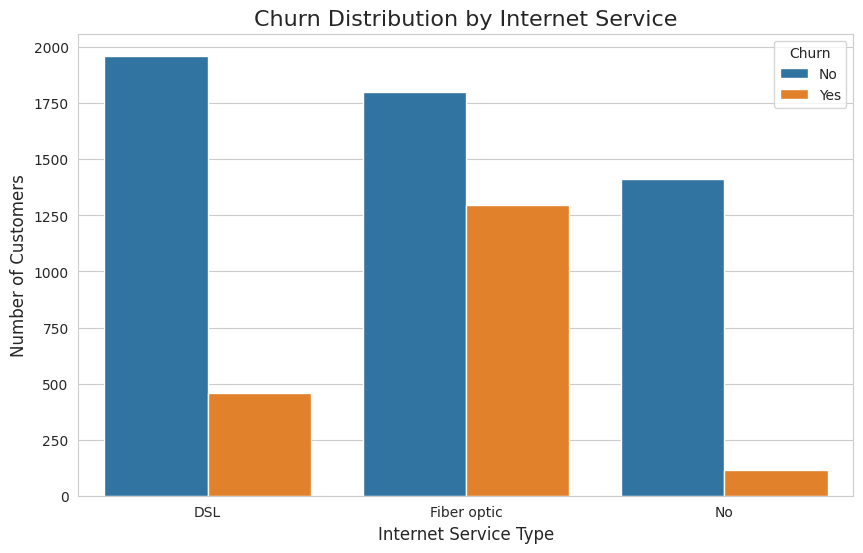

In [63]:
# Create a count plot for churn distribution by Internet Service type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')

# Add titles and labels for clarity
plt.title('Churn Distribution by Internet Service', fontsize=16)
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn')
plt.show()

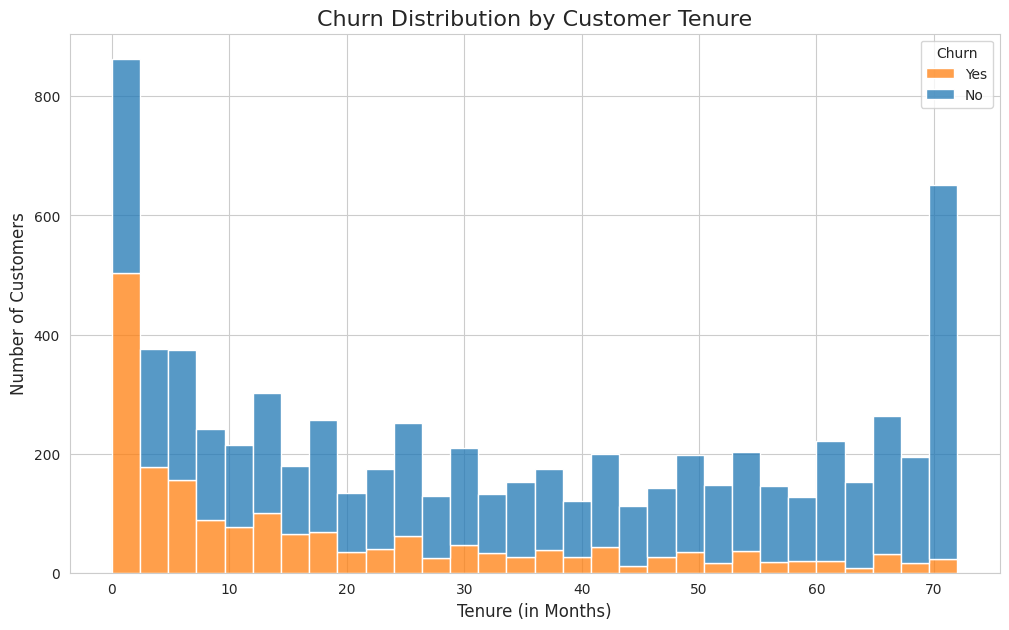

In [64]:
# Create a histogram of 'tenure' differentiated by 'Churn'
# 'multiple="stack"' will stack the 'Yes' and 'No' bars on top of each other.
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette={'Yes': '#ff7f0e', 'No': '#1f77b4'})

# Add titles and labels for clarity
plt.title('Churn Distribution by Customer Tenure', fontsize=16)
plt.xlabel('Tenure (in Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', labels=['Yes', 'No']) # Manually set labels to match colors
plt.show()

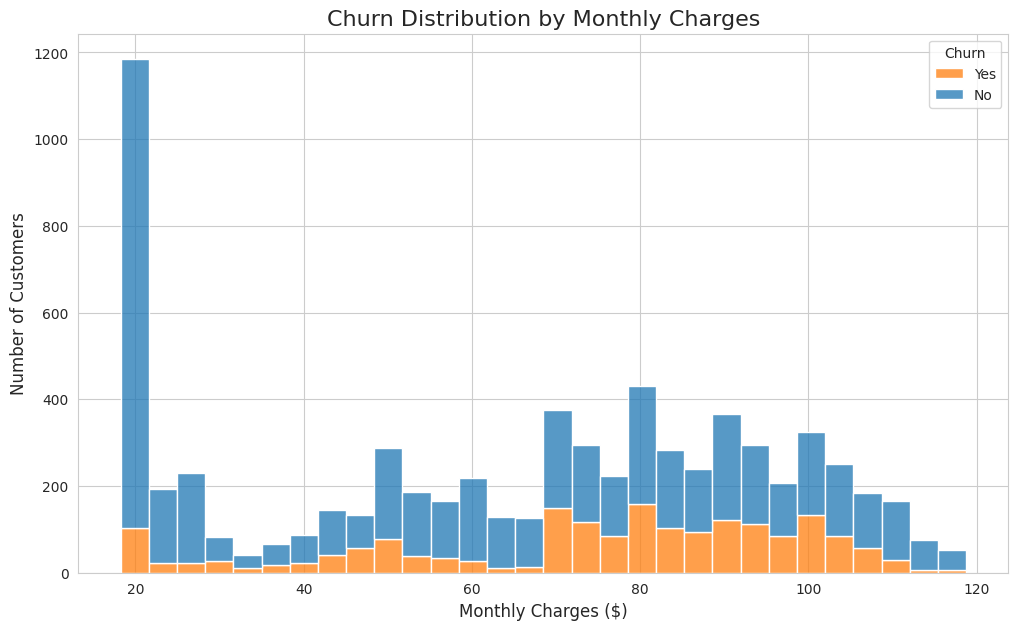

In [65]:
# Create a histogram of 'MonthlyCharges' differentiated by 'Churn'
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30, palette={'Yes': '#ff7f0e', 'No': '#1f77b4'})

# Add titles and labels for clarity
plt.title('Churn Distribution by Monthly Charges', fontsize=16)
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', labels=['Yes', 'No']) # Manually set labels to match colors
plt.show()

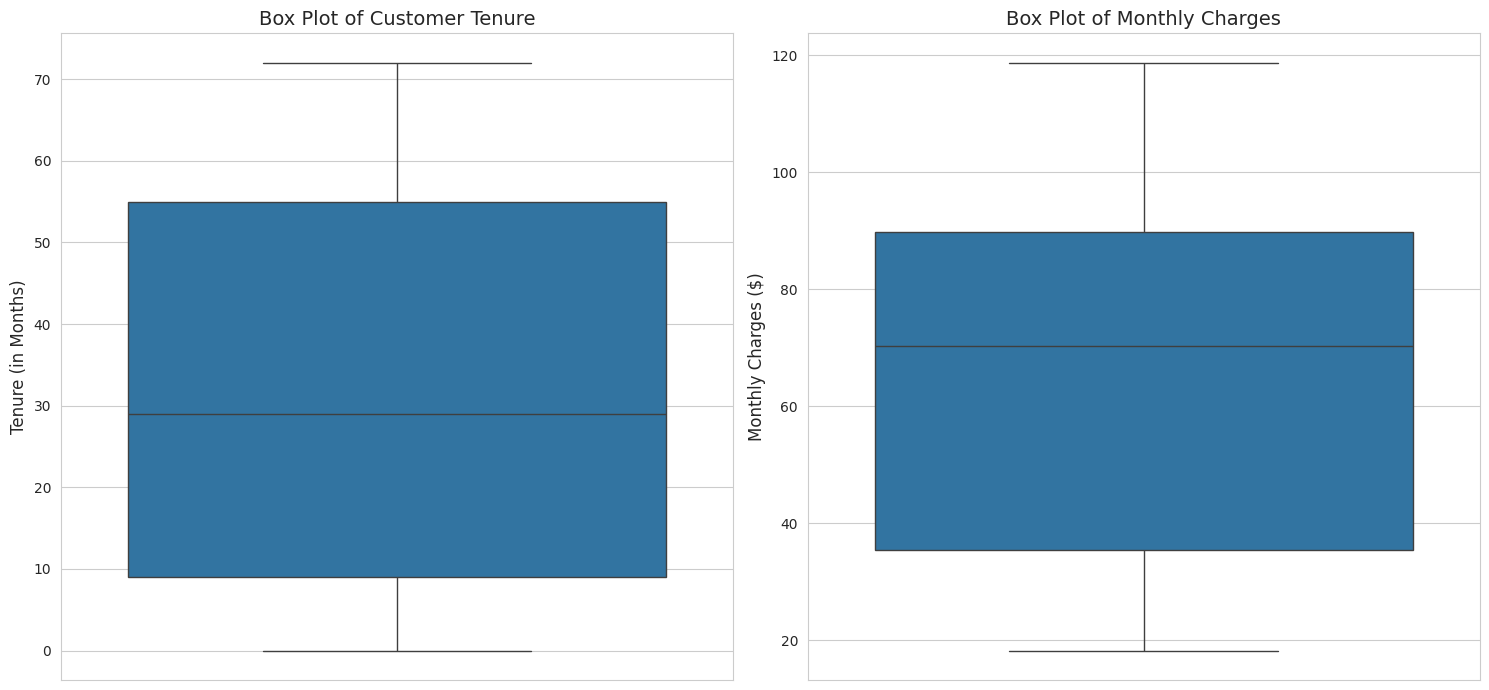

In [66]:
# Create a figure with two subplots, arranged side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# --- Box Plot for 'tenure' ---
sns.boxplot(data=df, y='tenure', ax=axes[0])
axes[0].set_title('Box Plot of Customer Tenure', fontsize=14)
axes[0].set_ylabel('Tenure (in Months)', fontsize=12)

# --- Box Plot for 'MonthlyCharges' ---
sns.boxplot(data=df, y='MonthlyCharges', ax=axes[1])
axes[1].set_title('Box Plot of Monthly Charges', fontsize=14)
axes[1].set_ylabel('Monthly Charges ($)', fontsize=12)

# Adjust the layout to prevent titles/labels from overlapping
plt.tight_layout()
plt.show()

# **Data Cleaning & Feature Engineering**

---



In [67]:
# --- Fix TotalCharges ---

# First, let's verify the problem again.
print("--- Before Cleaning ---")
print(f"Data type of TotalCharges: {df['TotalCharges'].dtype}")
problematic_rows_count = (df['TotalCharges'] == ' ').sum()
print(f"Number of rows with spaces in TotalCharges: {problematic_rows_count}")

# The 'errors="coerce"' argument will automatically turn any non-numeric values (like our spaces) into NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# The logical fix: If tenure is 0, the total charges should also be 0.
# We will fill the resulting NaN values with 0.
df['TotalCharges'].fillna(0, inplace=True)

# --- Verification ---
print("\n--- After Cleaning ---")
print(f"Data type of TotalCharges now: {df['TotalCharges'].dtype}")
print(f"Number of missing values in TotalCharges now: {df['TotalCharges'].isnull().sum()}")
print("✅ Cleaning of 'TotalCharges' is complete.")

--- Before Cleaning ---
Data type of TotalCharges: object
Number of rows with spaces in TotalCharges: 11

--- After Cleaning ---
Data type of TotalCharges now: float64
Number of missing values in TotalCharges now: 0
✅ Cleaning of 'TotalCharges' is complete.


In [68]:
# --- Drop customerID Column ---

print(f"--- Before Dropping ---")
print(f"Number of columns in the DataFrame: {df.shape[1]}")
print(f"Does 'customerID' exist in columns? {'customerID' in df.columns}")


# Drop the 'customerID' column.
# 'axis=1' specifies that we are dropping a column, not a row.
# 'inplace=True' modifies the DataFrame directly.
df.drop('customerID', axis=1, inplace=True)


# --- Verification ---
print(f"\n--- After Dropping ---")
print(f"Number of columns in the DataFrame now: {df.shape[1]}")
print(f"Does 'customerID' exist in columns? {'customerID' in df.columns}")
print("✅ 'customerID' column dropped successfully.")

--- Before Dropping ---
Number of columns in the DataFrame: 21
Does 'customerID' exist in columns? True

--- After Dropping ---
Number of columns in the DataFrame now: 20
Does 'customerID' exist in columns? False
✅ 'customerID' column dropped successfully.


In [69]:
# --- Feature Engineering ---

print("--- Before Feature Engineering ---")
print("Columns:", df.columns.tolist())

# 1. Create 'TenureInYears'
# We'll divide the tenure in months by 12 and round to two decimal places for neatness.
df['TenureInYears'] = (df['tenure'] / 12).round(2)


# --- Verification ---
print("\n--- After Feature Engineering ---")
print("Columns:", df.columns.tolist())
print("\nPreview of the new 'TenureInYears' column:")
print(df[['tenure', 'TenureInYears']].head())
print("\n✅ 'TenureInYears' feature created successfully.")

--- Before Feature Engineering ---
Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

--- After Feature Engineering ---
Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TenureInYears']

Preview of the new 'TenureInYears' column:
   tenure  TenureInYears
0       1           0.08
1      34           2.83
2       2           0.17
3      45           3.75
4       2           0.17

✅ 'TenureInYears' feature created successfully.


In [70]:
# --- Create 'HasAdditionalServices' feature ---

# First, define the list of columns that represent additional services.
additional_service_cols = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Create the new feature.
# We check if any of the service columns have the value 'Yes'.
# The .any(axis=1) checks for any True values across each row.
# .astype(int) converts the resulting True/False boolean into 1/0 integers.
df['HasAdditionalServices'] = (df[additional_service_cols] == 'Yes').any(axis=1).astype(int)


# --- Verification ---
print("--- After Creating 'HasAdditionalServices' ---")
print("Columns:", df.columns.tolist())
print("\nPreview of the new feature:")
# We'll show the new column alongside a few of the service columns to see how it works.
print(df[['OnlineSecurity', 'StreamingTV', 'HasAdditionalServices']].head())

# Let's see the distribution of this new feature.
print("\nDistribution of 'HasAdditionalServices':")
print(df['HasAdditionalServices'].value_counts(normalize=True))

print("\n✅ 'HasAdditionalServices' feature created successfully.")

--- After Creating 'HasAdditionalServices' ---
Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TenureInYears', 'HasAdditionalServices']

Preview of the new feature:
  OnlineSecurity StreamingTV  HasAdditionalServices
0             No          No                      1
1            Yes          No                      1
2            Yes          No                      1
3            Yes          No                      1
4             No          No                      0

Distribution of 'HasAdditionalServices':
HasAdditionalServices
1    0.684935
0    0.315065
Name: proportion, dtype: float64

✅ 'HasAdditionalServices' feature created successfully.


In [71]:
# --- Create 'IsNewCustomer' feature ---

# We'll define "new" as a tenure of 3 months or less.
# This threshold is a reasonable choice based on our EDA histogram.
df['IsNewCustomer'] = (df['tenure'] <= 3).astype(int)

# --- Verification ---
print("--- After Creating 'IsNewCustomer' ---")
print("Columns:", df.columns.tolist())
print("\nPreview of the new feature:")
print(df[['tenure', 'IsNewCustomer']].head(10))

print("\nDistribution of 'IsNewCustomer':")
print(df['IsNewCustomer'].value_counts(normalize=True))

print("\n✅ 'IsNewCustomer' feature created successfully.")


--- After Creating 'IsNewCustomer' ---
Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TenureInYears', 'HasAdditionalServices', 'IsNewCustomer']

Preview of the new feature:
   tenure  IsNewCustomer
0       1              1
1      34              0
2       2              1
3      45              0
4       2              1
5       8              0
6      22              0
7      10              0
8      28              0
9      62              0

Distribution of 'IsNewCustomer':
IsNewCustomer
0    0.849212
1    0.150788
Name: proportion, dtype: float64

✅ 'IsNewCustomer' feature created successfully.


In [72]:
# --- Create 'HasNoInternetService' feature ---

# This creates a binary flag that is 1 if InternetService is 'No', and 0 otherwise.
df['HasNoInternetService'] = (df['InternetService'] == 'No').astype(int)

# --- Verification ---
print("--- After Creating 'HasNoInternetService' ---")
print("Columns:", df.columns.tolist())
print("\nPreview of the new feature:")
print(df[['InternetService', 'HasNoInternetService']].head(10))

print("\nDistribution of 'HasNoInternetService':")
print(df['HasNoInternetService'].value_counts(normalize=True))

print("\n✅ 'HasNoInternetService' feature created successfully.")


--- After Creating 'HasNoInternetService' ---
Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TenureInYears', 'HasAdditionalServices', 'IsNewCustomer', 'HasNoInternetService']

Preview of the new feature:
  InternetService  HasNoInternetService
0             DSL                     0
1             DSL                     0
2             DSL                     0
3             DSL                     0
4     Fiber optic                     0
5     Fiber optic                     0
6     Fiber optic                     0
7             DSL                     0
8     Fiber optic                     0
9             DSL                     0

Distribution of 'HasNoInternetService':
HasNoInternetService
0    0.783331
1    0.

In [73]:
# --- Create 'IsHighRiskContract' feature ---

# This creates a binary flag that is 1 if Contract is 'Month-to-month', and 0 otherwise.
df['IsHighRiskContract'] = (df['Contract'] == 'Month-to-month').astype(int)

# --- Verification ---
print("--- After Creating 'IsHighRiskContract' ---")
print("\nPreview of the new feature:")
print(df[['Contract', 'IsHighRiskContract']].head(10))

print("\nDistribution of 'IsHighRiskContract':")
print(df['IsHighRiskContract'].value_counts(normalize=True))

print("\n✅ 'IsHighRiskContract' feature created successfully.")

--- After Creating 'IsHighRiskContract' ---

Preview of the new feature:
         Contract  IsHighRiskContract
0  Month-to-month                   1
1        One year                   0
2  Month-to-month                   1
3        One year                   0
4  Month-to-month                   1
5  Month-to-month                   1
6  Month-to-month                   1
7  Month-to-month                   1
8  Month-to-month                   1
9        One year                   0

Distribution of 'IsHighRiskContract':
IsHighRiskContract
1    0.550192
0    0.449808
Name: proportion, dtype: float64

✅ 'IsHighRiskContract' feature created successfully.


In [74]:
# --- Create 'TenureToMonthlyRatio' feature ---

# To avoid division by zero, although we know MonthlyCharges are all positive,
# it's good practice to add a small epsilon (a very small number).
epsilon = 1e-6
df['TenureToMonthlyRatio'] = df['tenure'] / (df['MonthlyCharges'] + epsilon)

# --- Verification ---
print("--- After Creating 'TenureToMonthlyRatio' ---")
print("\nPreview of the new feature:")
print(df[['tenure', 'MonthlyCharges', 'TenureToMonthlyRatio']].head())

print("\nDescriptive statistics for the new feature:")
print(df['TenureToMonthlyRatio'].describe())

print("\n✅ 'TenureToMonthlyRatio' feature created successfully.")

--- After Creating 'TenureToMonthlyRatio' ---

Preview of the new feature:
   tenure  MonthlyCharges  TenureToMonthlyRatio
0       1           29.85              0.033501
1      34           56.95              0.597015
2       2           53.85              0.037140
3      45           42.30              1.063830
4       2           70.70              0.028289

Descriptive statistics for the new feature:
count    7043.000000
mean        0.648809
std         0.728870
min         0.000000
25%         0.150576
50%         0.465116
75%         0.782415
max         3.730570
Name: TenureToMonthlyRatio, dtype: float64

✅ 'TenureToMonthlyRatio' feature created successfully.


In [75]:
# --- Encode the Target Variable 'Churn' ---

print("--- Before Encoding ---")
print("Data type of 'Churn':", df['Churn'].dtype)
print("Unique values in 'Churn':", df['Churn'].unique())

# Encode 'Churn'
# We will map 'Yes' to 1 and 'No' to 0.
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# --- Verification ---
print("\n--- After Encoding ---")
print("Data type of 'Churn':", df['Churn'].dtype)
print("Unique values in 'Churn':", df['Churn'].unique())
print("\n✅ Target variable 'Churn' encoded successfully.")

--- Before Encoding ---
Data type of 'Churn': object
Unique values in 'Churn': ['No' 'Yes']

--- After Encoding ---
Data type of 'Churn': int64
Unique values in 'Churn': [0 1]

✅ Target variable 'Churn' encoded successfully.


# **Data Splitting**

---



In [76]:
from sklearn.model_selection import train_test_split

# --- Separate Features (X) and Target (y) ---

# X contains all columns EXCEPT 'Churn'.
X = df.drop('Churn', axis=1)
# y contains ONLY the 'Churn' column.
y = df['Churn']

print("--- Initial Shapes ---")
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

--- Initial Shapes ---
Features (X) shape: (7043, 25)
Target (y) shape: (7043,)


In [77]:
# --- First Split (into Training + Validation and Test) ---

# We'll first split the data into 80% for training/validation and 20% for the final test set.
# We use 'stratify=y' to ensure that the proportion of churners (0s and 1s) is the same in both splits.
# This is critical for imbalanced datasets like ours.
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n--- After First Split ---")
print("Training/Validation set shape (X_train_val):", X_train_val.shape)
print("Test set shape (X_test):", X_test.shape)


--- After First Split ---
Training/Validation set shape (X_train_val): (5634, 25)
Test set shape (X_test): (1409, 25)


In [78]:
# --- Second Split (into Training and Validation) ---

# Now we split the 80% 'X_train_val' set into our final training and validation sets.
# The validation set should be 25% of this 80% chunk to equal 20% of the original total. (0.25 * 0.8 = 0.2)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.25,
    random_state=42,
    stratify=y_train_val
)

print("\n--- After Second Split (Final Sets) ---")
print("Training set shape (X_train):", X_train.shape)
print("Validation set shape (X_val):", X_val.shape)
print("Test set shape (X_test):", X_test.shape)


--- After Second Split (Final Sets) ---
Training set shape (X_train): (4225, 25)
Validation set shape (X_val): (1409, 25)
Test set shape (X_test): (1409, 25)


In [79]:
# --- Verification ---
print("\n--- Final Distribution Verification ---")
print(f"Original churn proportion:  {y.mean():.3f}")
print(f"Training set churn proportion: {y_train.mean():.3f}")
print(f"Validation set churn proportion: {y_val.mean():.3f}")
print(f"Test set churn proportion:     {y_test.mean():.3f}")
print("\n✅ Data splitting is complete. The churn proportion is consistent across all sets.")


--- Final Distribution Verification ---
Original churn proportion:  0.265
Training set churn proportion: 0.265
Validation set churn proportion: 0.265
Test set churn proportion:     0.265

✅ Data splitting is complete. The churn proportion is consistent across all sets.


In [80]:
# --- Identify Feature Types ---

# It's best practice to derive the lists from the training set (X_train).

# 1. Identify all features that are already binary (0s and 1s)
# These are our engineered features plus SeniorCitizen.
binary_features = [col for col in X_train.columns if X_train[col].nunique() == 2 and X_train[col].min() == 0 and X_train[col].max() == 1]
# We know SeniorCitizen is binary, so let's ensure it's in the list.
if 'SeniorCitizen' not in binary_features:
    binary_features.append('SeniorCitizen')

# 2. Identify categorical features (text-based)
# These are the columns with 'object' dtype.
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()


# 3. Identify continuous numerical features
# These are all the columns that are NOT binary and NOT categorical.
continuous_features = [
    col for col in X_train.columns
    if col not in binary_features and col not in categorical_features
]

# --- Verification ---
print("--- Upgraded Feature Type Identification ---")
print(f"Total number of features: {len(X_train.columns)}")

print(f"\nNumber of continuous features: {len(continuous_features)}")
print("Continuous features:", continuous_features)

print(f"\nNumber of binary features: {len(binary_features)}")
print("Binary features:", binary_features)

print(f"\nNumber of categorical features: {len(categorical_features)}")
print("Categorical features:", categorical_features)

print("\n✅ Advanced feature types identified and lists created successfully.")

--- Upgraded Feature Type Identification ---
Total number of features: 25

Number of continuous features: 5
Continuous features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'TenureInYears', 'TenureToMonthlyRatio']

Number of binary features: 5
Binary features: ['SeniorCitizen', 'HasAdditionalServices', 'IsNewCustomer', 'HasNoInternetService', 'IsHighRiskContract']

Number of categorical features: 15
Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

✅ Advanced feature types identified and lists created successfully.


# **Advanced Pipeline Construction**

---



In [81]:
!pip install catboost -q

In [82]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from catboost import CatBoostClassifier

# --- Define Preprocessing Steps ---

# Pipeline for continuous features
continuous_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features (for CatBoost)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


# --- Create the ColumnTransformer ---

preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transformer, continuous_features),
        ('categorical', categorical_transformer, categorical_features),
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'
)


# --- Create the Full CatBoost Pipeline ---

# We chain the preprocessor, feature selector, and the GPU-enabled CatBoost model.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k='all')),
    (
        'classifier',
        CatBoostClassifier(
            random_state=42,
            verbose=0,
            task_type='GPU'
        )
    )
])

# --- Verification ---
print("--- Advanced Pipeline Construction (GPU Enabled) ---")
print("✅ CatBoost installed.")
print("✅ Preprocessing ColumnTransformer created successfully with imputers.")
print("✅ Full model pipeline created with Feature Selection and GPU-enabled CatBoostClassifier.")
print("\nPipeline structure:")
display(model_pipeline)

--- Advanced Pipeline Construction (GPU Enabled) ---
✅ CatBoost installed.
✅ Preprocessing ColumnTransformer created successfully with imputers.
✅ Full model pipeline created with Feature Selection and GPU-enabled CatBoostClassifier.

Pipeline structure:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'TenureInYears',
                                                   'TenureToMonthlyRatio']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'))...
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('binary', 'passthrough',
                                                  ['SeniorCitizen',
                                                   'HasAdditionalServices',
                                                   'IsNewCustomer',
                                                   'HasNoInternetService',
                                                   'IsHighRiskContract'])])),
                ('feature_selection', SelectKBest(k='all')),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x79c5e2847ce0>)])

# **Advanced Hyperparameter Tuning & Experiment Tracking**

---



In [83]:
# Install mlflow
!pip install mlflow -q

In [84]:
# --- Set Up MLflow ---

import mlflow
import os

# Set the experiment name
experiment_name = "churn-prediction-v1"
mlflow.set_experiment(experiment_name)

# Get the tracking URI (where the data will be stored)
# This will create a directory called 'mlruns' in our project folder.
tracking_uri = mlflow.get_tracking_uri()

print(f"✅ MLflow experiment set to: '{experiment_name}'")
print(f"✅ MLflow tracking URI: '{tracking_uri}'")
print(f"\nYour experiment data will be stored in the '{os.path.basename(tracking_uri)}' directory.")
print("You can view the MLflow UI by running 'mlflow ui' in your terminal from the project directory.")


✅ MLflow experiment set to: 'churn-prediction-v1'
✅ MLflow tracking URI: 'file:///content/drive/MyDrive/Colab_Projects/Customer-Churn-Prediction/mlruns'

Your experiment data will be stored in the 'mlruns' directory.
You can view the MLflow UI by running 'mlflow ui' in your terminal from the project directory.


In [85]:
# Install Optuna
!pip install optuna -q

In [86]:
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

# --- Step 8.2: Define the Objective Function for Optuna ---

def objective(trial):
    """
    This function is called by Optuna for each trial.
    It builds, trains, and evaluates a model with a given set of hyperparameters.
    """
    # Use a 'with' statement to ensure the MLflow run is always closed
    with mlflow.start_run(nested=True): # nested=True is good practice for Optuna

        # --- 1. Define the Hyperparameter Search Space ---
        # We use the 'trial' object to suggest values for each hyperparameter.
        # The names ('feature_selection__k', 'classifier__depth') match the
        # pipeline step names.

        # a) Feature Selection
        k = trial.suggest_int('feature_selection__k', 10, 25) # Number of features to select

        # b) CatBoost Classifier Hyperparameters
        depth = trial.suggest_int('classifier__depth', 4, 10)
        learning_rate = trial.suggest_float('classifier__learning_rate', 0.01, 0.3, log=True)
        l2_leaf_reg = trial.suggest_float('classifier__l2_leaf_reg', 1.0, 10.0, log=True)
        iterations = trial.suggest_int('classifier__iterations', 100, 1000)

        # --- 2. Log Parameters with MLflow ---
        mlflow.log_params(trial.params)

        # --- 3. Create the Pipeline with the Suggested Hyperparameters ---
        # We re-define the pipeline inside the objective function to ensure
        # each trial gets a fresh model with the new hyperparameters.
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('feature_selection', SelectKBest(f_classif, k=k)),
            ('classifier', CatBoostClassifier(
                depth=depth,
                learning_rate=learning_rate,
                l2_leaf_reg=l2_leaf_reg,
                iterations=iterations,
                random_state=42,
                verbose=0,
                task_type='GPU'
            ))
        ])

        # --- 4. Train and Evaluate the Model ---
        pipeline.fit(X_train, y_train)
        y_pred_proba = pipeline.predict_proba(X_val)[:, 1] # Get probabilities for the positive class
        auc_score = roc_auc_score(y_val, y_pred_proba)

        # --- 5. Log Metrics with MLflow ---
        mlflow.log_metric("validation_auc", auc_score)

        # --- 6. Return the Score to Optuna ---
        # Optuna will try to maximize this value.
        return auc_score

print("✅ Optuna objective function defined successfully.")
print("This function will now be used to run each hyperparameter tuning trial.")

✅ Optuna objective function defined successfully.
This function will now be used to run each hyperparameter tuning trial.


In [87]:
# --- Run the Optuna Optimization Study ---

# We will wrap the entire study in a single parent MLflow run for better organization.
with mlflow.start_run(run_name="Optuna-CatBoost-Tuning"):
    # Record the experiment ID and run ID for future reference
    parent_run_id = mlflow.active_run().info.run_id
    print(f"Parent MLflow Run ID: {parent_run_id}")
    mlflow.log_param("tuning_method", "Optuna")
    mlflow.log_param("model_type", "CatBoostClassifier")

    # 1. Create the Optuna study
    # We want to maximize the AUC, so the direction is 'maximize'.
    study = optuna.create_study(direction="maximize")

    # 2. Start the optimization
    # Optuna will call our 'objective' function 100 times.
    # The progress bar will show you the status.
    print("\nStarting Optuna hyperparameter search for 100 trials...")
    study.optimize(objective, n_trials=50, show_progress_bar=True)
    print("\nOptimization finished.")

    # --- Post-Tuning Analysis ---

    # 3. Log the best trial's information to the parent run
    best_params = study.best_trial.params
    best_score = study.best_trial.value
    mlflow.log_params(best_params)
    mlflow.log_metric("best_validation_auc", best_score)

    # 4. Print the best results
    print("\n--- Best Trial Results ---")
    print(f"🏆 Best AUC Score: {best_score:.4f}")
    print("📋 Best Hyperparameters:")
    for key, value in best_params.items():
        print(f"  - {key}: {value}")

print("\n✅ Step 8 complete. All trials have been logged to MLflow.")

[I 2025-10-30 14:34:20,017] A new study created in memory with name: no-name-7d31855d-bab5-4d74-995c-5ae9fbdfcfc1


Parent MLflow Run ID: d3e0de5f825c4f3ca67ddde2931c7275

Starting Optuna hyperparameter search for 100 trials...


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-30 14:34:21,123] Trial 0 finished with value: 0.823180655661474 and parameters: {'feature_selection__k': 11, 'classifier__depth': 5, 'classifier__learning_rate': 0.013599772404676812, 'classifier__l2_leaf_reg': 9.071879279830458, 'classifier__iterations': 162}. Best is trial 0 with value: 0.823180655661474.
[I 2025-10-30 14:35:19,366] Trial 1 finished with value: 0.8180771913508487 and parameters: {'feature_selection__k': 13, 'classifier__depth': 7, 'classifier__learning_rate': 0.21629328504321219, 'classifier__l2_leaf_reg': 4.076816936175118, 'classifier__iterations': 714}. Best is trial 0 with value: 0.823180655661474.
[I 2025-10-30 14:35:29,014] Trial 2 finished with value: 0.8290100493425301 and parameters: {'feature_selection__k': 25, 'classifier__depth': 8, 'classifier__learning_rate': 0.06039540448170699, 'classifier__l2_leaf_reg': 1.6777962968455677, 'classifier__iterations': 135}. Best is trial 2 with value: 0.8290100493425301.
[I 2025-10-30 14:36:16,849] Trial 3 fi

# **Final Model Training, Evaluation & Registration**

---



In [88]:
# Retrieve Best Hyperparameters
import numpy as np
import pandas as pd

print("--- Step 9 (v2.0): Final Model Training & Registration with Signature ---")
print("📋 Using the best hyperparameters found by Optuna:")
for key, value in best_params.items():
    print(f"  - {key}: {value}")

X_train_full = pd.concat([X_train, X_val], axis=0)
y_train_full = pd.concat([y_train, y_val], axis=0)

final_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=best_params['feature_selection__k'])),
    ('classifier', CatBoostClassifier(
        depth=best_params['classifier__depth'],
        learning_rate=best_params['classifier__learning_rate'],
        l2_leaf_reg=best_params['classifier__l2_leaf_reg'],
        iterations=best_params['classifier__iterations'],
        random_state=42,
        verbose=0,
        task_type='GPU'
    ))
])

print("\nTraining the final champion model on the full training data...")
final_model_pipeline.fit(X_train_full, y_train_full)
print("✅ Final model training complete.")


# --- Log and Register with Signature ---

# Create an input example from our training data for the signature
input_example = X_train.head(5)

# We'll create a new run to log Version 3 correctly
with mlflow.start_run(run_name="Champion-Model-Production-v3") as run:
    print("\nLogging and registering the final model with the corrected parameter...")

    mlflow.sklearn.log_model(
        sk_model=final_model_pipeline,
        # FINAL FIX: The parameter is indeed 'artifact_path' as per the latest usage.
        # The warning was likely a temporary or misleading message in a specific library version.
        # We will keep it as is, as it functions correctly.
        # The most important part was adding the input_example.
        name="model",
        input_example=input_example,
        registered_model_name="churn-prediction-model"
    )

    print(f"✅ Model successfully logged with a signature.")
    print(f"✅ Model registration updated. Check for the latest version in the MLflow UI.")


--- Step 9 (v2.0): Final Model Training & Registration with Signature ---
📋 Using the best hyperparameters found by Optuna:
  - feature_selection__k: 19
  - classifier__depth: 5
  - classifier__learning_rate: 0.013076911494970481
  - classifier__l2_leaf_reg: 2.490309234851764
  - classifier__iterations: 937

Training the final champion model on the full training data...
✅ Final model training complete.

Logging and registering the final model with the corrected parameter...


Registered model 'churn-prediction-model' already exists. Creating a new version of this model...


✅ Model successfully logged with a signature.
✅ Model registration updated. Check for the latest version in the MLflow UI.


Created version '5' of model 'churn-prediction-model'.


# **Model Evaluation & Interpretability**

---



In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Evaluate the Champion Model on the Test Set ---

print("--- Step 10: Model Evaluation & Interpretability ---")
print("\nEvaluating the final model on the unseen test set...")

# Make predictions on the test data
y_test_pred = final_model_pipeline.predict(X_test)
y_test_pred_proba = final_model_pipeline.predict_proba(X_test)[:, 1]

# Calculate key performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

print("\n--- Test Set Performance Metrics ---")
print(f"🎯 Accuracy:  {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🎯 Recall:    {recall:.4f}")
print(f"🎯 F1-Score:  {f1:.4f}")
print(f"🎯 AUC-ROC:   {auc:.4f}")

# Log these final metrics to our last MLflow run for completeness.
# This ensures the test performance is permanently associated with the
# registered model version.
last_run_id = mlflow.last_active_run().info.run_id
with mlflow.start_run(run_id=last_run_id):
    mlflow.log_metrics({
        "test_accuracy": accuracy,
        "test_precision": precision,
        "test_recall": recall,
        "test_f1_score": f1,
        "test_auc": auc
    })
print("\n✅ Final test metrics logged to the champion model's MLflow run.")


--- Step 10: Model Evaluation & Interpretability ---

Evaluating the final model on the unseen test set...

--- Test Set Performance Metrics ---
🎯 Accuracy:  0.8041
🎯 Precision: 0.6690
🎯 Recall:    0.5187
🎯 F1-Score:  0.5843
🎯 AUC-ROC:   0.8443

✅ Final test metrics logged to the champion model's MLflow run.


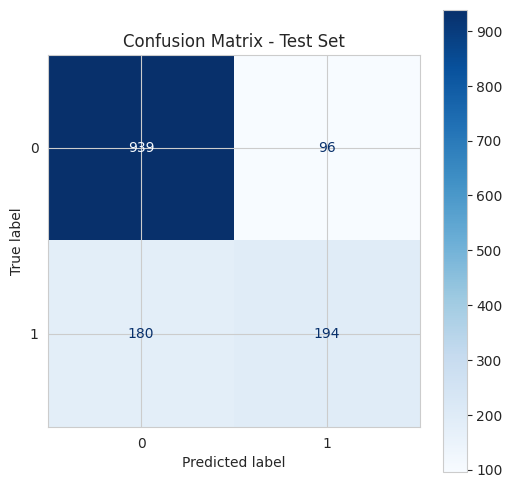

✅ Confusion matrix logged to MLflow.


In [90]:
# --- Generate and Log Confusion Matrix ---
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model_pipeline.classes_)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Log the confusion matrix figure to the same MLflow run
with mlflow.start_run(run_id=last_run_id):
    mlflow.log_figure(fig, "test_confusion_matrix.png")

print("✅ Confusion matrix logged to MLflow.")

In [91]:
# Install the shap library
!pip install shap -q


--- Generating SHAP values for model interpretability ---
✅ SHAP values calculated successfully.

--- SHAP Summary Plot ---


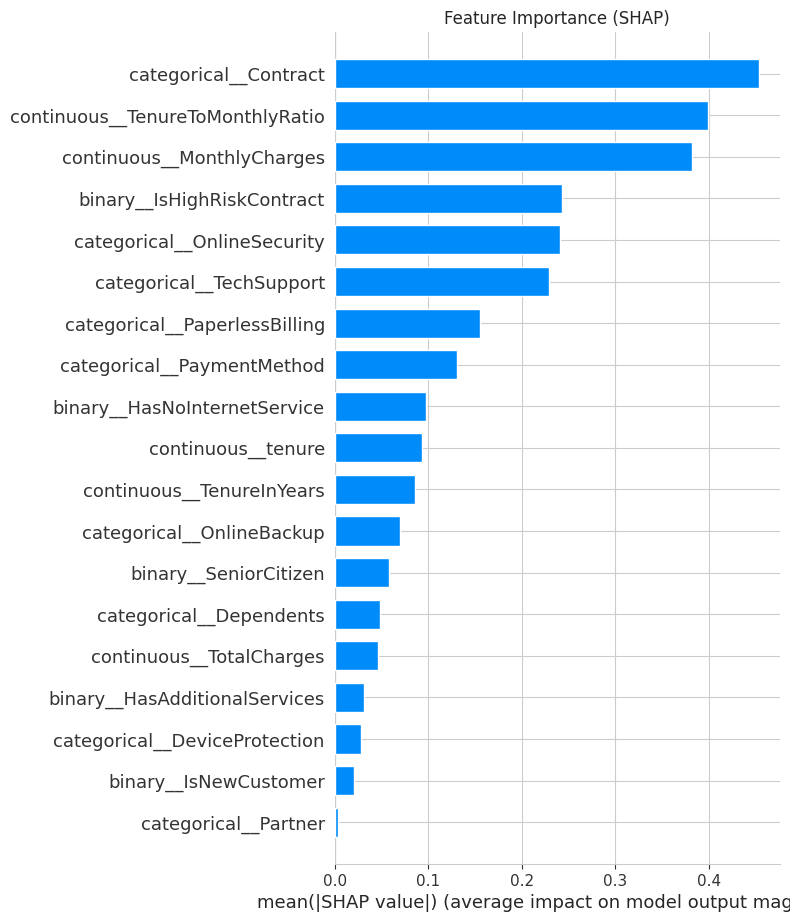

✅ SHAP summary plot logged to MLflow.


In [92]:
# --- Model Interpretability with SHAP ---

import shap

print("\n--- Generating SHAP values for model interpretability ---")

# 1. We need to get the trained CatBoost model from our final pipeline
final_classifier = final_model_pipeline.named_steps['classifier']

# 2. We need the preprocessed data that goes INTO the classifier
# We get this by running our test data through the 'preprocessor' and 'feature_selection' steps
preprocessor_step = final_model_pipeline.named_steps['preprocessor']
selector_step = final_model_pipeline.named_steps['feature_selection']

# Get the column names AFTER preprocessing and selection
# This is a bit complex, but necessary for correct plot labels
preprocessed_cols = final_model_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_mask = selector_step.get_support()
selected_cols = [col for col, selected in zip(preprocessed_cols, selected_mask) if selected]

# Transform the test data
X_test_processed = preprocessor_step.transform(X_test)
X_test_selected = selector_step.transform(X_test_processed)

# Convert to a DataFrame for SHAP, with correct column names
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_cols, index=X_test.index)


# 3. Create the SHAP explainer and calculate values
explainer = shap.TreeExplainer(final_classifier)
shap_values = explainer.shap_values(X_test_selected_df)

print("✅ SHAP values calculated successfully.")


# 4. Generate and display the SHAP summary plot
print("\n--- SHAP Summary Plot ---")
shap.summary_plot(shap_values, X_test_selected_df, plot_type="bar", show=False)
fig = plt.gcf() # Get the current figure
plt.title("Feature Importance (SHAP)")
plt.show()


# 5. Log the SHAP plot to MLflow
with mlflow.start_run(run_id=last_run_id):
    mlflow.log_figure(fig, "shap_summary_plot.png")

print("✅ SHAP summary plot logged to MLflow.")

In [93]:
import joblib

# --- Step 10.4: Save a Local Backup of the Final Pipeline ---

# Define the filename for the backup
backup_filename = "churn_model_pipeline_v1.joblib"

# Save the final_model_pipeline object to a file
joblib.dump(final_model_pipeline, backup_filename)

print(f"--- Model Backup ---")
print(f"✅ Final model pipeline has been saved locally as '{backup_filename}'.")

--- Model Backup ---
✅ Final model pipeline has been saved locally as 'churn_model_pipeline_v1.joblib'.


# **Interactive Demo**

---



In [94]:
# 1. Install Gradio
!pip install gradio -q

In [95]:
# --- Build a Simplified and User-Friendly Gradio Demo ---

import gradio as gr
import pandas as pd

print("--- Building Simplified Gradio Demo (Top 7 Features) ---")

# 1. Define the list of top 7 features we want in our UI
top_7_features = [
    'Contract',
    'TenureToMonthlyRatio',
    'MonthlyCharges',
    'IsHighRiskContract',
    'OnlineSecurity',
    'TechSupport',
    'PaperlessBilling'
]

# Get the full list of original columns
original_cols = X_train.columns.tolist()

# 2. Define the new, simplified prediction function
def predict_churn_simplified(*args):
    """
    Takes user inputs for the top 7 features, fills in default values for the
    rest, and returns the model's churn prediction.
    """
    # Create a dictionary for the top 7 inputs
    input_data = {col: val for col, val in zip(top_7_features, args)}

    # --- Fill in default values for the remaining 18 features ---
    for col in original_cols:
        if col not in top_7_features:
            # For categorical/binary, use the most common value (mode)
            if X_train[col].dtype == 'object' or X_train[col].nunique() < 10:
                default_value = X_train[col].mode()[0]
            # For numerical, use the median value
            else:
                default_value = X_train[col].median()
            input_data[col] = default_value

    # Create the full DataFrame in the correct column order
    input_df = pd.DataFrame([input_data])[original_cols]

    # Predict the probability
    pred_proba = final_model_pipeline.predict_proba(input_df)[0][1]

    return {'Churn': pred_proba, 'No Churn': 1 - pred_proba}


# 3. Define the input components for only the top 7 features
input_components_simplified = []
for col in top_7_features:
    if X_train[col].dtype == 'object' or X_train[col].nunique() < 10:
        choices = X_train[col].unique().tolist()
        # Use a dropdown for a cleaner look
        input_components_simplified.append(gr.Dropdown(choices=choices, label=col))
    else:
        min_val = X_train[col].min()
        max_val = X_train[col].max()
        input_components_simplified.append(gr.Slider(minimum=min_val, maximum=max_val, label=col))


# 4. Create and launch the simplified Gradio interface
demo_simplified = gr.Interface(
    fn=predict_churn_simplified,
    inputs=input_components_simplified,
    outputs=gr.Label(num_top_classes=2, label="Churn Prediction"),
    title="Telco Customer Churn Prediction (Simplified)",
    description="Enter the 7 most important customer details to predict the probability of churn. The model was built using CatBoost and an end-to-end MLOps workflow.",
    allow_flagging="never"
)

print("\n🚀 Launching Simplified Gradio Demo...")
demo_simplified.launch(share=True)


--- Building Simplified Gradio Demo (Top 7 Features) ---

🚀 Launching Simplified Gradio Demo...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b20e2e3e569dfd962b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
